In [3]:
###BRS module###
#1.trim image (remove unwanted area of mammogram image)
#2.compress image to a fix size image

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [4]:
#read image
image = cv2.imread('breast.png')

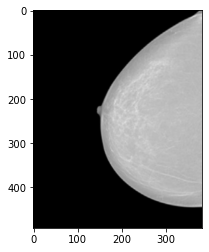

In [5]:
plt.imshow(image)

In [6]:
#1.invert image
#2.blur image
#3.convert to gray
img=cv2.bitwise_not(image)
blur = cv2.GaussianBlur(img, (3,3), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)


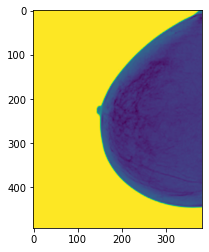

In [7]:
plt.imshow(gray)

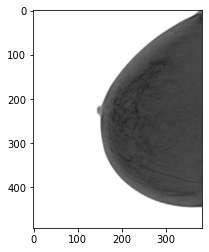

In [8]:
plt.imshow(img)

In [20]:
thresh = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)[1]
x, y, w, h = cv2.boundingRect(thresh)         
left = (x, np.argmax(thresh[:, x]))              
right = (x+w-1, np.argmax(thresh[:, x+w-1]))     
top = (np.argmax(thresh[y, :]), y)               
bottom = (np.argmax(thresh[y+h-1, :]), y+h-1)    

#print extreme outer points of image
print('left: {}'.format(left))
print('right: {}'.format(right))
print('top: {}'.format(top))
print('bottom: {}'.format(bottom))

#crop image
crop_img = image[top[1]:bottom[1]-top[1],left[0]:right[0]]

left: (144, 222)
right: (381, 0)
top: (374, 0)
bottom: (342, 445)


In [10]:


#show images
"""
cv2.imshow('thresh', thresh)
cv2.imshow('image', image)
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)
"""

'\ncv2.imshow(\'thresh\', thresh)\ncv2.imshow(\'image\', image)\ncv2.imshow("cropped", crop_img)\ncv2.waitKey(0)\n'

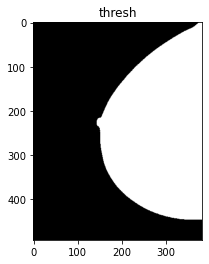

In [11]:
img2 = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.title('thresh')
plt.show()



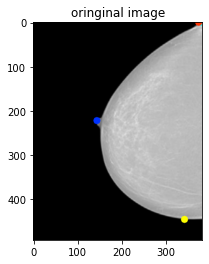

In [12]:
plt.imshow(image)
plt.title('oringinal image')
plt.show()

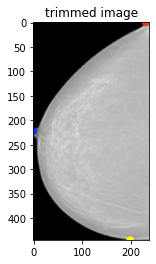

In [13]:
plt.imshow(crop_img)
plt.title('trimmed image')
plt.show()

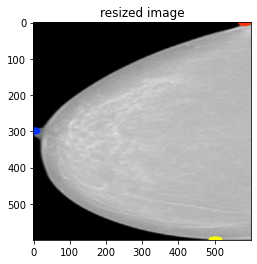

In [14]:
#resize image to 600x600
image_resized= cv2.resize(crop_img,(600,600))
plt.imshow(image_resized)
plt.title('resized image')
plt.show()